# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [4]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

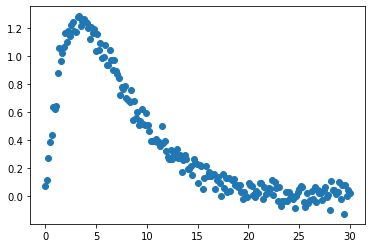

In [8]:
plt.scatter(x,y)

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [24]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.3)

Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

Text(0, 0.5, 'Error')

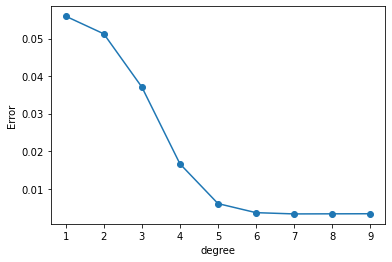

In [25]:
# TODO
import numpy.polynomial.polynomial as poly

d_list = np.array(range(1,10))
RSStest=[]

for d in d_list:
    beta_hat = poly.polyfit(xtr,ytr,d)
    
    y_hat = poly.polyval(xts,beta_hat)
    RSS = np.mean((y_hat - yts)**2)
    RSStest.append(RSS)
    
plt.plot(d_list, RSStest, '-o')
plt.xlabel('degree')
plt.ylabel("Error")


    

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

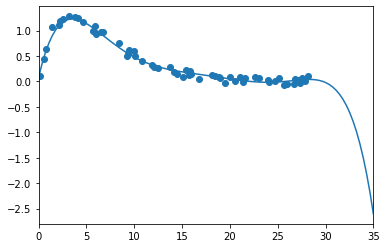

In [42]:
# TODO
dopt = 6
beta_hat = poly.polyfit(xtr,ytr,dopt)
xline = np.linspace(0,35,100)
y_hat = poly.polyval(xline,beta_hat)
plt.xlim([0,35])
plt.plot(xline, y_hat, '-')
plt.scatter(xts,yts)

